# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [12]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [13]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [3]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [8]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [14]:
# Define features (X) and target variable (y)
X = data.drop(columns=["MEDV"])  # Features: all columns except MEDV
y = data["MEDV"]  # Target variable

# Split the dataset into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset sizes
print(f"✅ Data successfully split!")
print(f"📊 Training set size: {X_train.shape[0]} samples")
print(f"📊 Testing set size: {X_test.shape[0]} samples")


✅ Data successfully split!
📊 Training set size: 404 samples
📊 Testing set size: 102 samples


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Generate predictions for training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"✅ Model trained successfully!")

print(f"\n📊 Training Set Performance:")
print(f"   MAE: {train_mae:.2f}")
print(f"   MSE: {train_mse:.2f}")
print(f"   R² Score: {train_r2:.2f}")

print(f"\n📊 Testing Set Performance:")
print(f"   MAE: {test_mae:.2f}")
print(f"   MSE: {test_mse:.2f}")
print(f"   R² Score: {test_r2:.2f}")


✅ Model trained successfully!

📊 Training Set Performance:
   MAE: 0.17
   MSE: 0.05
   R² Score: 0.93

📊 Testing Set Performance:
   MAE: 0.15
   MSE: 0.04
   R² Score: 0.95


## 3. Calculate and print R-squared for both the training and the testing set.

In [16]:
from sklearn.metrics import r2_score

# Calculate R-squared for training and testing sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print R-squared values
print(f"📊 R-squared (R²) Scores:")
print(f"   ✅ Training Set R²: {train_r2:.2f}")
print(f"   ✅ Testing Set R²: {test_r2:.2f}")


📊 R-squared (R²) Scores:
   ✅ Training Set R²: 0.75
   ✅ Testing Set R²: 0.67



## 4. Calculate and print mean squared error for both the training and the testing set.

In [17]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE) for training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Print MSE values
print(f"📊 Mean Squared Error (MSE):")
print(f"   ✅ Training Set MSE: {train_mse:.2f}")
print(f"   ✅ Testing Set MSE: {test_mse:.2f}")


📊 Mean Squared Error (MSE):
   ✅ Training Set MSE: 21.64
   ✅ Testing Set MSE: 24.29


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [18]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE) for training and testing sets
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Print MAE values
print(f"📊 Mean Absolute Error (MAE):")
print(f"   ✅ Training Set MAE: {train_mae:.2f}")
print(f"   ✅ Testing Set MAE: {test_mae:.2f}")


📊 Mean Absolute Error (MAE):
   ✅ Training Set MAE: 3.31
   ✅ Testing Set MAE: 3.19


## Classification Model Evaluation

In [19]:
from sklearn.datasets import load_iris
data = load_iris()

In [20]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [21]:
column_names = data.feature_names

In [22]:
df = pd.DataFrame(data['data'],columns=column_names)

In [23]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
target = pd.DataFrame(data.target)

In [25]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [26]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [27]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd ##نسوي داتا فريم يسهل التعامل مع الداتا

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)  # Create a DataFrame
df["class"] = iris.target  # Add target column عمود يمثل نوع الزهرة

# Define features (X) and target variable (y)
X = df.drop(columns=["class"])  # Features: all columns except "class"
y = df["class"]  # Target variable: class (flower type)

# Split the dataset into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset sizes
print(f"✅ Data successfully split!")
print(f"📊 Training set size: {X_train.shape[0]} samples")
print(f"📊 Testing set size: {X_test.shape[0]} samples")


✅ Data successfully split!
📊 Training set size: 120 samples
📊 Testing set size: 30 samples


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create and train the Logistic Regression model
model = LogisticRegression(max_iter=200)  # Increase max_iter to ensure convergence
model.fit(X_train, y_train)

# Generate predictions for training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate model accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print results
print(f"✅ Model trained successfully!")

print(f"\n📊 Training Set Accuracy: {train_accuracy:.2f}")
print(f"📊 Testing Set Accuracy: {test_accuracy:.2f}")


✅ Model trained successfully!

📊 Training Set Accuracy: 0.97
📊 Testing Set Accuracy: 1.00


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [29]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracy scores
print(f"📊 Accuracy Scores:")
print(f"   ✅ Training Set Accuracy: {train_accuracy:.2f}")
print(f"   ✅ Testing Set Accuracy: {test_accuracy:.2f}")


📊 Accuracy Scores:
   ✅ Training Set Accuracy: 0.97
   ✅ Testing Set Accuracy: 1.00


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [30]:
from sklearn.metrics import balanced_accuracy_score

# Calculate balanced accuracy for training and testing sets
train_balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred)
test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)

# Print balanced accuracy scores
print(f"📊 Balanced Accuracy Scores:")
print(f"   ✅ Training Set Balanced Accuracy: {train_balanced_accuracy:.2f}")
print(f"   ✅ Testing Set Balanced Accuracy: {test_balanced_accuracy:.2f}")


📊 Balanced Accuracy Scores:
   ✅ Training Set Balanced Accuracy: 0.98
   ✅ Testing Set Balanced Accuracy: 1.00


## 10. Calculate and print the precision score for both the training and the testing set.

In [31]:
from sklearn.metrics import precision_score

# Calculate precision for training and testing sets
train_precision = precision_score(y_train, y_train_pred, average="weighted")
test_precision = precision_score(y_test, y_test_pred, average="weighted")

# Print precision scores
print(f"📊 Precision Scores:")
print(f"   ✅ Training Set Precision: {train_precision:.2f}")
print(f"   ✅ Testing Set Precision: {test_precision:.2f}")


📊 Precision Scores:
   ✅ Training Set Precision: 0.98
   ✅ Testing Set Precision: 1.00


## 11. Calculate and print the recall score for both the training and the testing set.

In [32]:
from sklearn.metrics import recall_score

# Calculate recall for training and testing sets
train_recall = recall_score(y_train, y_train_pred, average="weighted")
test_recall = recall_score(y_test, y_test_pred, average="weighted")

# Print recall scores
print(f"📊 Recall Scores:")
print(f"   ✅ Training Set Recall: {train_recall:.2f}")
print(f"   ✅ Testing Set Recall: {test_recall:.2f}")


📊 Recall Scores:
   ✅ Training Set Recall: 0.97
   ✅ Testing Set Recall: 1.00


## 12. Calculate and print the F1 score for both the training and the testing set.

In [33]:
from sklearn.metrics import f1_score

# Calculate F1 score for training and testing sets
train_f1 = f1_score(y_train, y_train_pred, average="weighted")
test_f1 = f1_score(y_test, y_test_pred, average="weighted")

# Print F1 scores
print(f"📊 F1 Scores:")
print(f"   ✅ Training Set F1 Score: {train_f1:.2f}")
print(f"   ✅ Testing Set F1 Score: {test_f1:.2f}")


📊 F1 Scores:
   ✅ Training Set F1 Score: 0.97
   ✅ Testing Set F1 Score: 1.00


## 13. Generate confusion matrices for both the training and the testing set.

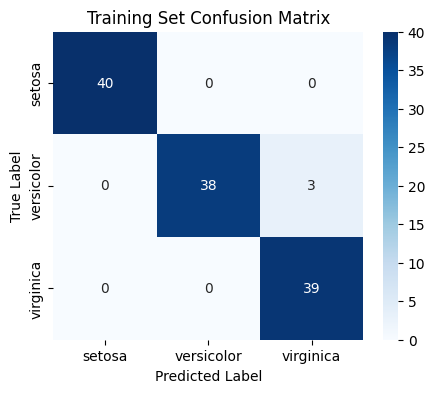

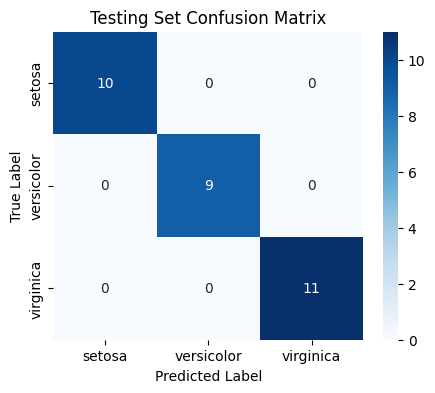

In [36]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrices
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(train_cm, "Training Set Confusion Matrix")
plot_confusion_matrix(test_cm, "Testing Set Confusion Matrix")


## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [37]:
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.datasets import load_iris

warnings.filterwarnings("ignore")

### 📌 Boston Housing (Regression) ###
# Load dataset
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=cols)
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["MEDV"]), df["MEDV"], test_size=0.2, random_state=42)

# Train and evaluate models
reg_models = {"Linear": LinearRegression(), "RandomForest": RandomForestRegressor(), "SVR": SVR()}
for name, model in reg_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}: MSE={mean_squared_error(y_test, y_pred):.2f}, R²={r2_score(y_test, y_pred):.2f}")

### 📌 Iris (Classification) ###
# Load dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Train and evaluate models
clf_models = {"Logistic": LogisticRegression(), "RandomForest": RandomForestClassifier(), "SVC": SVC()}
for name, model in clf_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}: Accuracy={accuracy_score(y_test, y_pred):.2f}")


Linear: MSE=24.29, R²=0.67
RandomForest: MSE=8.96, R²=0.88
SVR: MSE=52.84, R²=0.28
Logistic: Accuracy=1.00
RandomForest: Accuracy=1.00
SVC: Accuracy=1.00
